# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

## Задачи:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - 1) выделить целевые группы клиентов;
    - 2) предложить меры по снижению оттока;
    - 3) определить другие особенности взаимодействия с клиентами.

## План выполнения работы

## Шаг 1. Загрузить данные

Загрузить данные, получить первичное представление и проверить на пропуски и дубликаты.

## Шаг 2. Провести исследовательский анализ данных (EDA)

- Изучить датасет на отсутствующие признаки, изучить средние значения и стандартные отклонения;
- Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Построить матрицу корреляций и отобразить её.

## Шаг 3. Построить модель прогнозирования оттока клиентов

- Разбить данные на обучающую и валидационную выборку функцией train_test_split().
- Обучить модель на train-выборке двумя способами:
    - логистической регрессией,
    - случайным лесом.
- Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

## Шаг 4. Сделать кластеризацию клиентов

- Стандартизировать данные.
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму.
- Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировть кластеры клиентов. За число кластеров принять n=5.
- Построить распределения признаков для кластеров. 
- Для каждого полученного кластера посчитать долю оттока.

## Шаг 5. Сформулировть выводы и сделать базовые рекомендации по работе с клиентами

Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания.

## Шаг 1. Загрузить данные

In [1]:
!pip install --upgrade scikit-learn==0.20.3
!pip install sklearn
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.4 MB 1.1 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=659696d0334a75f7f518240ab23319902c41b2bbdd24df8be5fc92e4ad49ecc0
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.1 MB/s eta 0:00:01


In [2]:
#импортируем необходимые библиотеки для работы с данными
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
warnings.filterwarnings("ignore")

In [3]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
print('Количество дублей:', gym.duplicated().sum())

Количество дублей: 0


In [8]:
#заменим названия столбцов, приведя к нижнему регистру
gym.columns = gym.columns.str.lower()

In [9]:
#значения столбца month_to_end_cotract приведем к целочисленному типу
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')

Данные загружены, пропущенных значений нет, дубликатов тоже. Для удобства названия столбцов были приведены к нижнему регистру и изменен тип данных по стобцу month_to_end_cotract. Можно двигаться дальше

## Шаг 2. Проведите исследовательский анализ данных (EDA)

In [10]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Какие выводи можно сделать из средних значений:

- Мужчин и женщин примерно одинаковое количество
- Большинство клиентов находятся рядом с фитнес-центром
- Почти половина клиентов - сотрдуники компаний партнеров
- Около трети клиентов были приведены по акции "Приведи друга"
- Телефон указан почти у всех клиентов (90%)
- Средняя длительность абонемента 4 месяцев. Медиана равна единице, то есть чаще всего берут абонементы длительностью 1 месяц
- Средний возраст - 29 лет
- В среднем фитнес-центр зарабатывает 146.94 от других услуг фитнес-центра
- Среднее время до конца абонемента 4 месяца. Однако мы знаем и видим, что у большенства эта цифра 1
- В среднем наши клиенты с нами около 4 месяцев, медианное значение - 3 месяца.
- Средняя частота посещений в неделю за прошлый месяц составляет 1.88
- Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77
- Средний факт оттока 27%. То есть в прошлом месяце потеряли чуть больше четверти клиентов.

In [11]:
#посмотрим на средние значения признаков групп тех, кто остался и тех, кто ушел в отток
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Проживание в районе, где находится центр положительно влияет на клиентов, чтобы они оставались 
- Также на то, чтобы продолжать ходить в фитнес-центр влияет длительность абонемента
- Клиенты, посещающие групповые занятия, с большей вероятностью продалжат ходить к нам
- Дополнительную услуги, предоставляющиеся фитнес-центром также влияют на то, что люди продолжат ходить
- Длительность текущего действующего абонемента демонстирует, что в основном отваливаются те, кто не прозанимался и двух месяцев, а вот те, кто остался занимаютс практически шесть месяцев
- Средняя частота посещений в неделю, на самом деле, играет роль. Принято считать, что оптимальное количество тренировок в неделю - 2 или 3 - соответственно, те, кто придерживается этого плана, остаются нашими клиентами; а те, кто ходит по одному разу в неделю - отваливаются

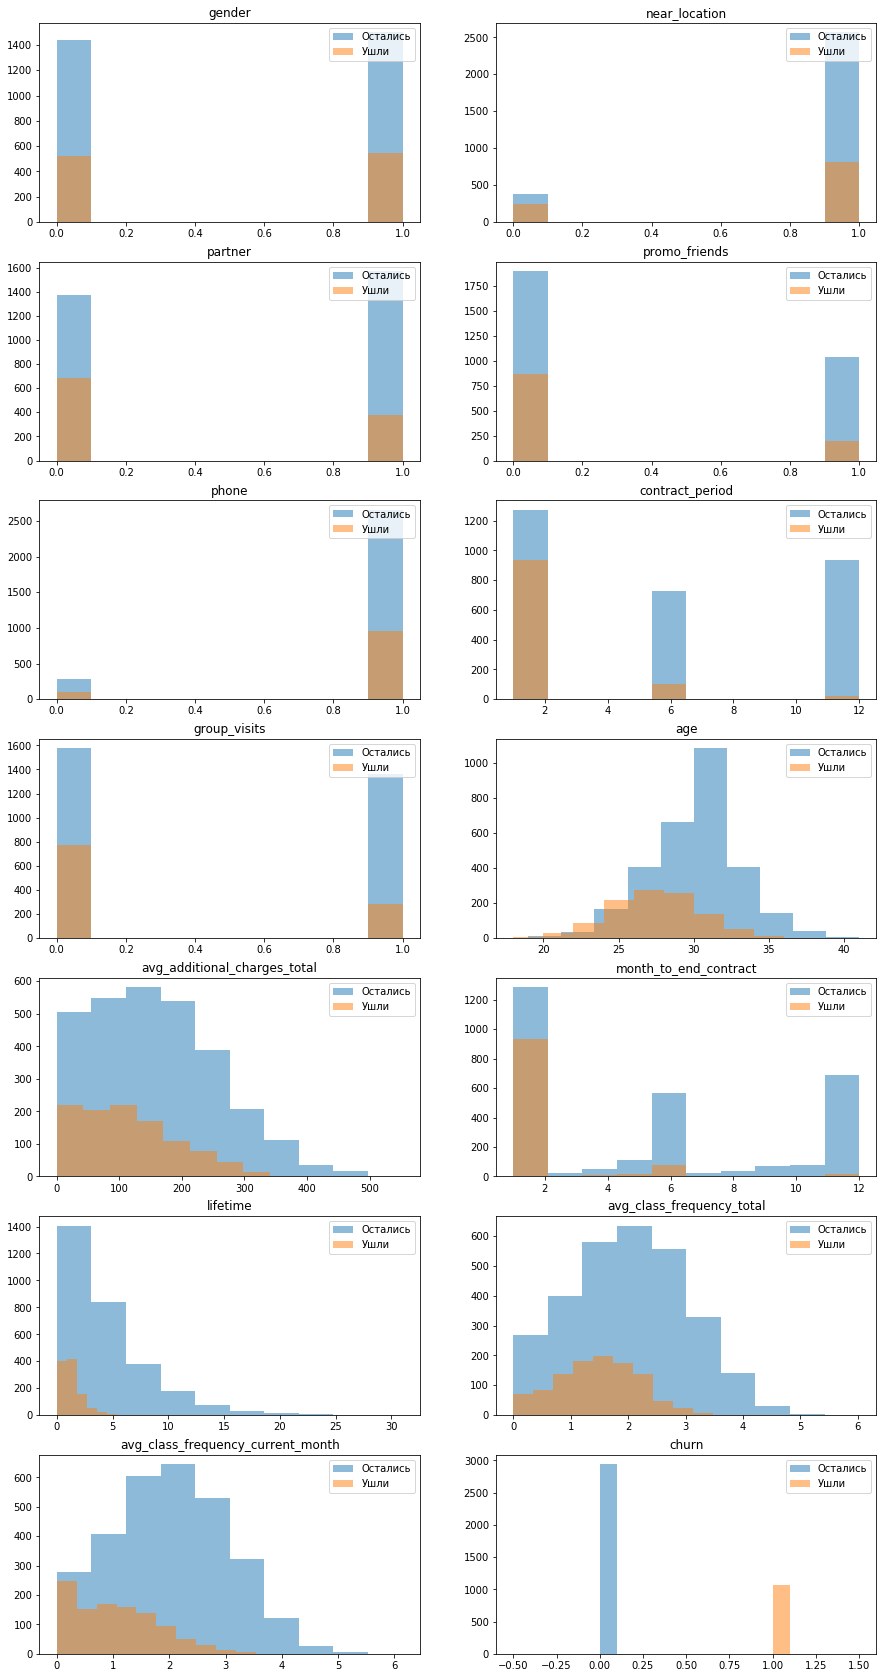

In [12]:
# Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался (не попали в отток)
gym_churn_0 = gym.query('churn == 0')
gym_churn_1 = gym.query('churn == 1')

fig, ax = plt.subplots((len(gym.columns)+1)//2, 2, figsize = (15, 30)) 
ax = ax.ravel()
for i in range(len(gym.columns)):
    col_name = gym.columns[i]
    ax[i].hist(gym_churn_0[col_name], alpha = 0.5, label = 'Остались')
    ax[i].hist(gym_churn_1[col_name], alpha = 0.5, label = 'Ушли')
    ax[i].legend(loc='upper right')
    ax[i].set_title(col_name)
plt.show();

Выводы по графикам:
- Мужчин и женщин практически поровну в обеих группах (тех, кто остался и тех, кто ушел);
- В отток уходят те, кто не проживает рядом с фитнес-центром (из общего количество клиентов около тысячи не имела фитнес-центра в своем районе и им приходилось дольше добираться до него);
- Больше осталось тех клиентов, чья компания состоит в партнерских отношениях с фитнес-центром;
- Клиенты, которые пришли в фитнес-центр по приглашению друга с большей вероятностью остаются постоянными;
- Больше склонны оставаться клиенты, которые предоставляют свой контактный телефон;
- Большая вероятность оттока у тех клиентов, которые изначально оформляют абонемент на один месяц, в то время, как от шести месяцев и до года клиенты становятся лояльны нашей компании;
- Групповые визиты способствуют удержанию клиента;
- Больше остаются клиентов в возрасте от 26 до 33 лет;
- Те, кто больше тратит денег в сопутствуюших услугах фитнес-центра(кафе, сауна, массаж и т.д) сильнее привязываются к фитнес-центру;
- Чем дольше времени остается до окончания срока действия абонемента, особенно 6 или 12 месяцев, тем большая вероятность удержания клиента;
- От трех до шести месяцев проходит с момента первого обращения клиента в фитнес-центр, чтобы осуществилась его привязка к нашим услугам;
- У тех, кто ушел в отток, частота посещений за все время действия абонемента ниже, чем у тех, кто остался;
- У тех клиентов, кто остался выше частота посещений за предыдущий месяц, чем у тех, кто ушел в отток;
- Больше тех, кто остался ~ 75% клиентов остались в фитнес-центре.

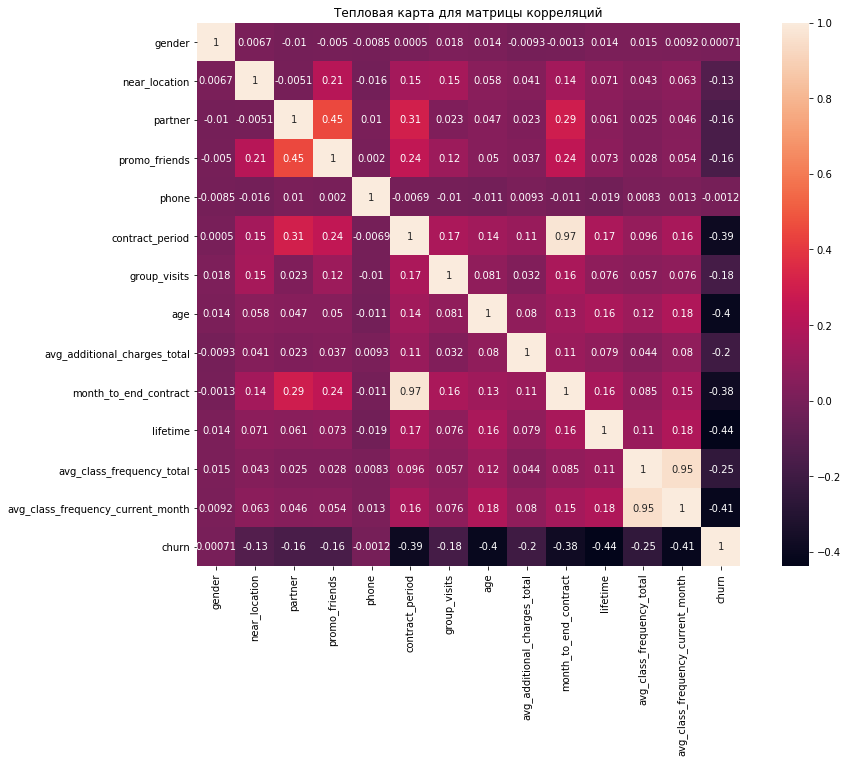

In [13]:
#Построить матрицу корреляций и отобразить её
cm = gym.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (15, 10))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True) 
plt.title('Тепловая карта для матрицы корреляций')
plt.show()

Сильная корреляция наблюдается между посещяемостью фитнес-центра в текущем месяце и за все время. Кроме того, чрезвычайно сильная корреляция между сроком абонемента и количеством месяцев до его окончания. Что так же не удивительно. Так же, средняя зависимость просматривается между признаком партнер и программой приведи друга. Вероятно клиенты по партнерской программе чащу зовут друзей/коллег в фитнес-центр.

## Шаг 3. Построить модель прогнозирования оттока клиентов

Приступим к построению модели бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

In [14]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [15]:
X = gym.drop(columns=['churn'])
y = gym['churn']

In [16]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [17]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [18]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.84


In [19]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics( y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.90
	Recall: 0.80


На основании оценки метрик accuracy, precision и recall можно сделать вывод, что разницы между моделью логистической регрессии и моделью случайного леса практически нет. Обе метрики показали хорошие результаты

## Шаг 4. Сделать кластеризацию клиентов

In [20]:
#стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

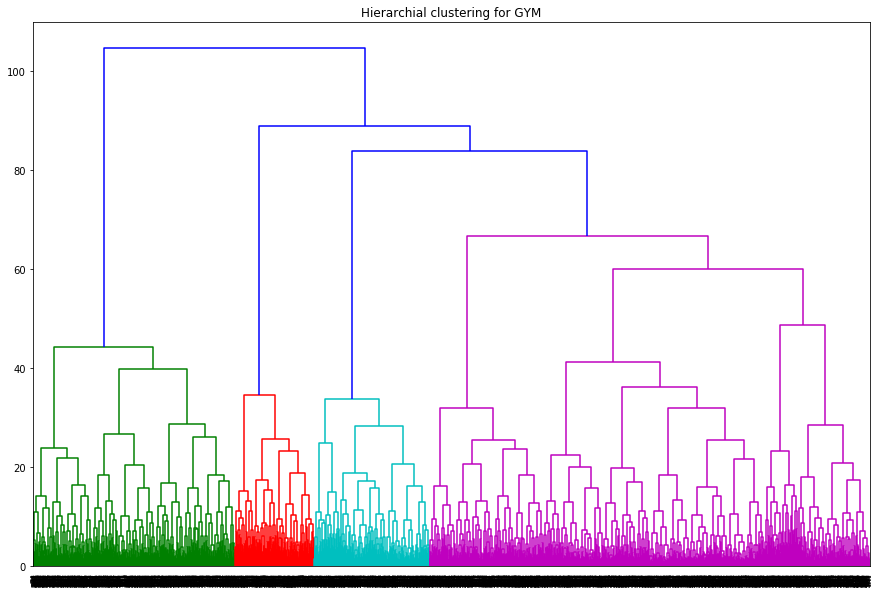

In [21]:
#основа для дендограммы
linked = linkage(X_sc, method = 'ward')

#строим дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show();

Получив дендограмму, мы видим 4 кластера. Но для дальнейшей работы выделим 5 кластеров для более равномерного разделения на кластеры

In [22]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [23]:
from sklearn.cluster import KMeans
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(gym.drop(columns = ['churn'], axis = 1))

In [24]:
gym['cluster_km'] = labels

In [25]:
#статистика по средним значениям наших признаков по кластеру
print(gym.drop('churn', axis=1).groupby(['cluster_km']).mean())

              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.506823       0.825536  0.488304       0.293372  0.908382   
1           0.523272       0.878702  0.510578       0.344147  0.897038   
2           0.510881       0.844560  0.495337       0.320207  0.903627   
3           0.516066       0.839338  0.453749       0.281402  0.896787   
4           0.465201       0.857143  0.512821       0.333333  0.926740   

            contract_period  group_visits        age  \
cluster_km                                             
0                  4.196881      0.387914  28.914230   
1                  5.413258      0.434415  29.335684   
2                  4.727461      0.421762  29.398964   
3                  4.317429      0.407011  28.966894   
4                  5.805861      0.432234  29.864469   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

- Среднее значение кластера по признаку пол ~0.5. Отличается только 4 кластер со средним 0.46
- Среднее значние кластера по признаку удаленности фитнес-зала 0.85. Явных различий нет
- В принципе по остальным признакам средние значения практичеси не отличаются в каждом кластере и более менее похожи
- Явные различия можно увидеть по признаку суммарной выручки от других услуг фитнес-центра. Наибольшее значение 352.17 у кластера №4, наименьшее 34.23 у кластера 5. Этот признак оказался пограничным

In [26]:
#создадим списки с дискретными и непрерывными величинами
disc_features = ['gender', 'near_location', 'partner', 
                 'promo_friends', 'phone', 'contract_period', 
                 'group_visits']
 
cont_features = ['age', 'avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 'month_to_end_contract', 'lifetime']

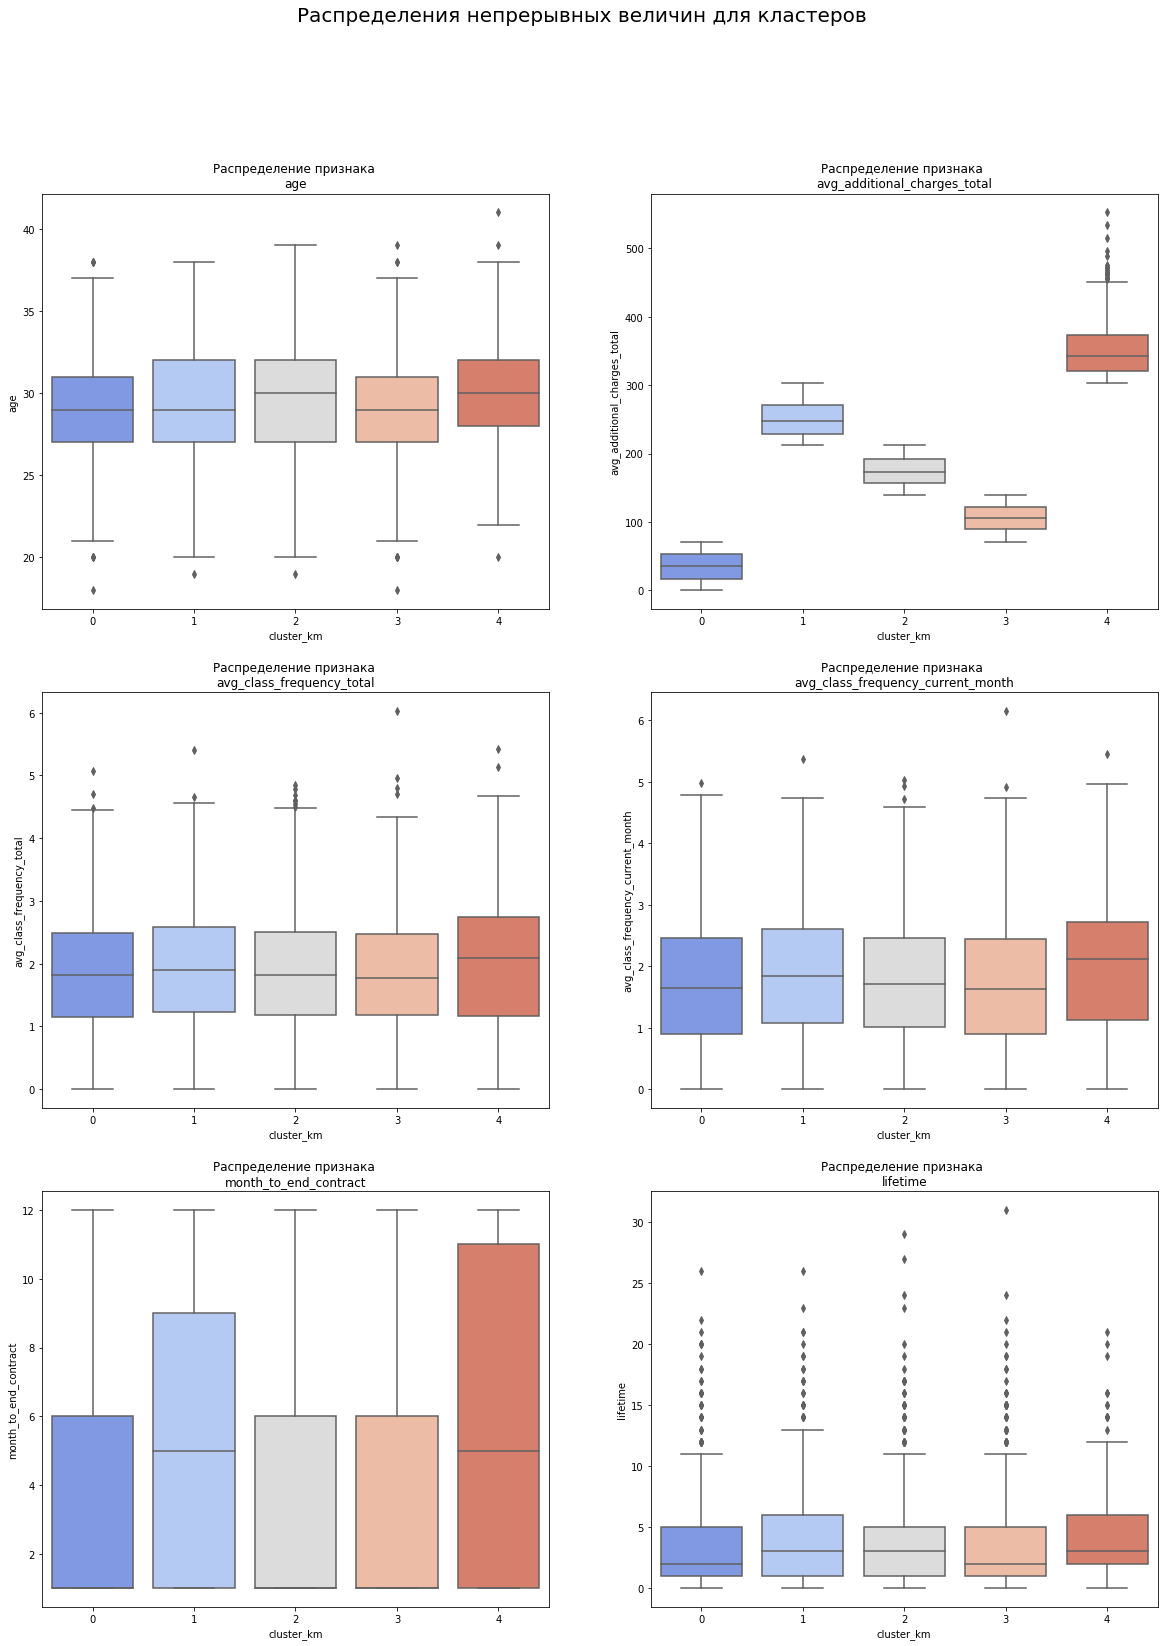

In [27]:
for i, col in enumerate(cont_features):
    plt.subplot(3, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(20, 26)
    sns.boxplot(data = gym.drop('churn', axis=1),y = col, x = 'cluster_km',palette='coolwarm')
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределения непрерывных величин для кластеров',fontsize=20)
plt.show()

In [28]:
sns.__version__

'0.11.1'

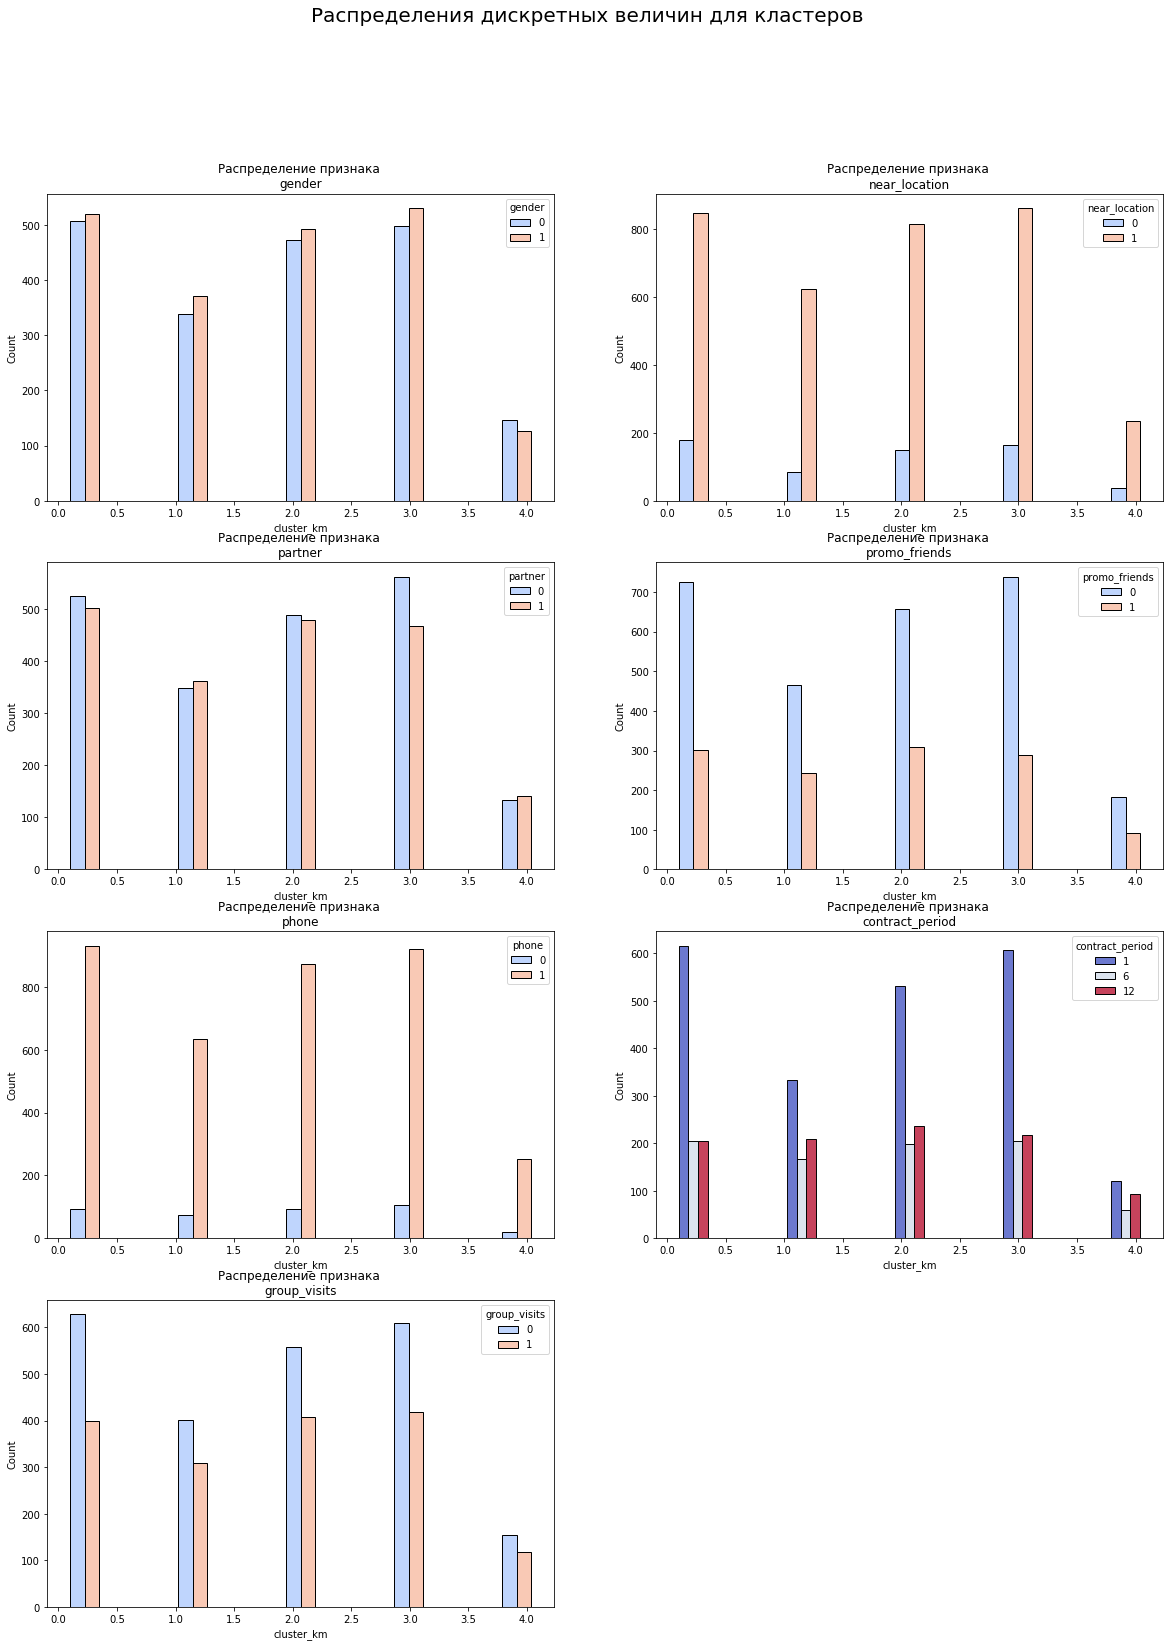

In [29]:
for i,col in enumerate(disc_features):
    plt.subplot(4, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(20, 26)
    sns.histplot(data = gym.drop('churn', axis=1), x = 'cluster_km', hue = col, multiple="dodge", shrink=.8,palette='coolwarm')
    plt.title('Распределение признака \n'+ str(col))
    fig.suptitle('Распределения дискретных величин для кластеров', fontsize=20)
plt.show();

- Средний возраст по всем кластерам 29 лет
- Клиенты из 5 кластера проживют далеко от фитнес-центра
- Клиенты из 5 кластера не являются сотрудниками компании-партнёра клуба
- Клиенты из 5 кластера не посещают групповые занятия в отличие от остальных 
- Запись в рамках акции "приведи друга" - выражена слабо
- По всем кластерам нблюдается наличие мобильного телефона
- Время с момента первого обращения в фитнес-центр 1 и 4 кластера 2 месяца. Время с момента первого обращения в фитнес-центр 2, 3 и 5 кластера 3 месяца
- Длительность текущего периода преобладает 1 месяц для 5 кластеров
- Для 1,3 и 4 кластеров срок до окончания абонемента составляет 6 месяцев. Наибольший для 5 кластера срок составляет 12 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента составляет 2 раза для всех кластеров
- Средняя частота посещений в неделю за предыдущий месяц 1,5 раза в неделю для 1-4 кластеров. 2 раза в неделю для 5 кластера
- Наименьшая средняя выручка оказалась у 3 кластера, наибольшая у 5 кластера

In [30]:
#посчитаем долю оттока для каждого кластера
gym.groupby('cluster_km').agg({'churn' : 'mean'})

,churn
cluster_km,
0,0.349903
1,0.177715
2,0.229016
3,0.333982
4,0.043956


Больше всего доля оттока в пятом кластере. Меньше всего доля оттока в четвертом кластере.

## Шаг 5. Сформулировть выводы и сделать базовые рекомендации по работе с клиентами

Очевидно, что для того, чтобы клиенты не только приходили, но и не уходили, необходимо их удерживать и привлекать. На наш взгляд, следует развивать следующие направления:

- необходимо открывать точки в разных районах, чтобы у большего количества людей была возможность пользоваться нашими услугами;
- развивать групповые тренировки, так как они способствуют прямому удержанию клиентов;
- для получения дополнительного дохода можно ввести специальные акции на услуги, которые предоставляет фитнес-центр;
- стимулировать клиентов сразу оформлять абонемент на длительный срок, так как ниже вероятность оттока;
- конечно же, налаживать взаимодействие с различными компаниями, а также предлагать бонусы за реферальные приглашения (так мы не только сохраним текущих клиентов, но и привлечем больше новых).